
## Introduction

You need to ensure that the TrAItor cannot outsmart the model. You need to determine the areas where the model needs improvement. Can you make the model detect multiple items?

## Objective

Make the model detect specific items.

**NOTE** Rate Limit requirements.

Please limit endpoint requests to 1 request per second per user. Any excessive requests may result in disqualification from the competition.

## Setup

In order to interact with the challenge, you will need your API Key.

You can find this key in the Crucible platform in this challenge.

[https://crucible.dreadnode.io/challenges/autopilot3](https://crucible.dreadnode.io/challenges/autopilot3)

In [24]:
CRUCIBLE_API_KEY = "YOUR_API_KEY"  # Replace with your actual API key
with open('../api.txt', 'r') as f:
    CRUCIBLE_API_KEY = f.readline()

### Install Required Packages

Install the required packages.


In [ ]:
%pip install requests

### Set Notebook Variables

Set the variables used throughout the notebook


In [25]:
CHALLENGE = "autopilot3"
CRUCIBLE_URL = "https://crucible.dreadnode.io"
CHALLENGE_URL = "https://autopilot3.crucible.dreadnode.io"
ARTIFACT_FILES = ['road.jpg']

### Download Data

In [ ]:
import requests

for artifact in ARTIFACT_FILES:
    url = f"{CRUCIBLE_URL}/api/artifacts/{CHALLENGE}/{artifact}"
    headers = {"X-API-Key": CRUCIBLE_API_KEY}
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        with open(artifact, "wb") as file:
            file.write(response.content)
        print(f"{artifact} was successfully downloaded")
    else:
        print(f"Failed to download {artifact}")

## Supplemental Materials

Use these materials for help solving the challenge.

### Helper Functions

In [27]:
import base64
import os
from io import BytesIO
import requests

from PIL import Image


def image_to_base64(img: Image.Image) -> str:
    buffered = BytesIO()
    img.save(buffered, format="JPEG")
    img_bytes = buffered.getvalue()
    img_base64 = base64.b64encode(img_bytes).decode("utf-8")
    return img_base64

## Submit Your Findings

Submit findings placeholder

In [ ]:
# stop sign: 11
# car: 2

In [174]:
def query(image_path):
    img = Image.open(image_path)
    img_base64 = image_to_base64(img)
    response = requests.post(
        f"{CHALLENGE_URL}/score",
        headers={"X-API-Key": CRUCIBLE_API_KEY},
        json={"data": img_base64},
    )
    return response.json()

In [181]:
img = '9.jpg'
response = query(img)
print(response)

for i in response['distance']:
    print(i)

{'error': 'Missing some targets, put on x-ray glasses and try again', 'distance': [{'x1': 0.6345172119140727, 'y1': -0.08217529296871362, 'x2': -0.3807958984374977, 'y2': -0.02093261718755457, 'confidence': -0.0034602519798279108, 'class': 0}, {'x1': 259.989560546875, 'y1': 15.332242736816411, 'x2': 93.90035888671878, 'y2': 96.922939453125, 'confidence': 0.009835543708801242, 'class': 7}, {'x1': -394.90351562499995, 'y1': -745.4693951416016, 'x2': -314.16657714843745, 'y2': -756.6797430419922, 'confidence': 0.002150738449096634, 'class': 1}, {'x1': 272.0729614257813, 'y1': 212.9730102539063, 'x2': 365.75996582031246, 'y2': 314.54167480468755, 'confidence': -0.001083702449798607, 'class': 9}, {'x1': 586.4148193359375, 'y1': -188.96670654296872, 'x2': 303.2378125, 'y2': -174.4867919921876, 'confidence': -0.16016292951583866, 'class': -15}, {'x1': -584.5760131835937, 'y1': 526.1389111328125, 'x2': -863.960400390625, 'y2': 374.6322412109375, 'confidence': -0.13479650510787966, 'class': -44

In [177]:
response['distance'] = [response['distance'][1]]

In [178]:
import cv2
import matplotlib.pyplot as plt

# Read the image

def show(origin_x, origin_y):
    image = cv2.imread(img)  # Replace 'your_image.jpg' with your actual image file path

    # Check if the image was loaded successfully
    if image is None:
        print("Error: Image not found or unable to load.")
        exit()

    # Convert BGR (OpenCV default) to RGB for displaying with matplotlib
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Get image dimensions
    image_height, image_width, _ = image.shape

    # Define the origin position (adjustable)
    # For example, to set the origin at the center of the image:
    image_height, image_width = 1208, 1920
    # origin_x = 700
    # origin_y = 1000
    # origin_x = 0
    # origin_y = 0

    coordinates = response['distance']

    for idx, d in enumerate(coordinates):
        # Adjust coordinates based on the origin
        x1 = int(d['x1'] + origin_x)
        y1 = int(d['y1'] + origin_y)
        x2 = int(d['x2'] + origin_x)
        y2 = int(d['y2'] + origin_y)

        # Swap x1 and x2 if x1 > x2
        if x1 > x2:
            x1, x2 = x2, x1

        # Swap y1 and y2 if y1 > y2
        if y1 > y2:
            y1, y2 = y2, y1

        # Clip the coordinates to be within the image boundaries
        # x1 = max(0, min(x1, image_width - 1))
        # x2 = max(0, min(x2, image_width - 1))
        # y1 = max(0, min(y1, image_height - 1))
        # y2 = max(0, min(y2, image_height - 1))

        if x1 < 0 or x2 < 0 or y1 < 0 or y2 < 0:
            print(f"Sub-image {idx} is out of bounds, skipping.")
            continue
        if x1 >= image_width or x2 >= image_width or y1 >= image_height or y2 >= image_height:
            print(f"Sub-image {idx} is out of bounds, skipping.")
            continue


        # Check if the coordinates are valid (non-zero area)
        if x2 - x1 > 0 and y2 - y1 > 0:
            # Extract the sub-image
            sub_image = image[y1:y2, x1:x2]

            # Display the sub-image
            plt.figure()
            plt.imshow(sub_image)
            plt.title(f"Sub-image {idx}")
            plt.axis('off')
            plt.show()
        else:
            print(f"Sub-image {idx} has zero area or invalid coordinates, skipping.")



Sub-image 0 has zero area or invalid coordinates, skipping.


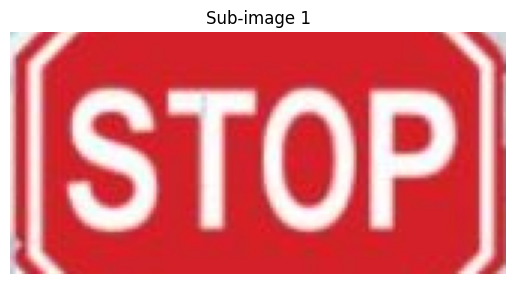

Sub-image 2 is out of bounds, skipping.


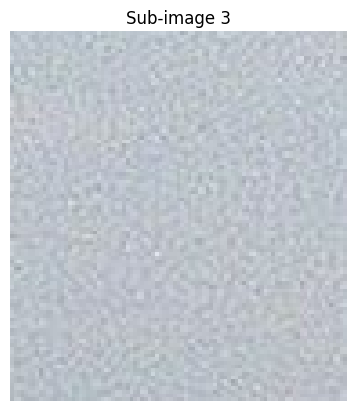

Sub-image 4 is out of bounds, skipping.
Sub-image 5 is out of bounds, skipping.


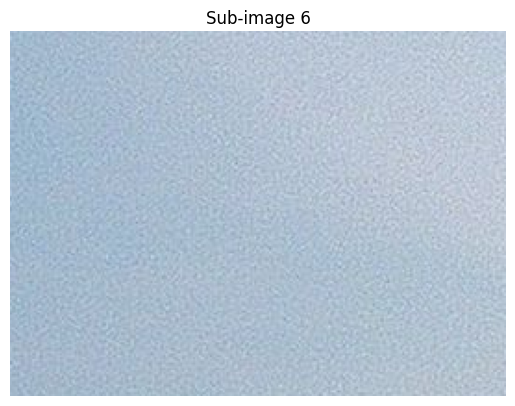

In [182]:
show(480, 150)

In [ ]:
for i in range(0, 1920, 50):
    for j in range(0, 1208, 50):
        print(i, j)
        show(i, j)

## Submit Your Flag

When you find the answer, you will get a flag back. It will look something like `gAAAAA ...`.
You can submit it using the code below, or, on the challenge page.

In [ ]:
import requests


def submit_flag(flag):
    url = f"{CRUCIBLE_URL}/api/challenges/{CHALLENGE}/submit-flag"
    headers = {"X-API-Key": CRUCIBLE_API_KEY}
    payload = {"challenge": CHALLENGE, "flag": flag}
    response = requests.post(url, headers=headers, json=payload)
    if response.status_code == 200:
        if response.json().get("correct") is True:
            print("The flag was correct. Congrats!")
        else:
            print("The flag was incorrect. Keep trying!")
    else:
        print("There was an error submitting your flag")
        print(response.text)


FLAG = "gAAAAA..."  # Replace with the flag once you find it
submit_flag(FLAG)